In [14]:
!pip uninstall torch torchtext torchvision torchaudio -y
!pip cache purge

Found existing installation: torch 2.7.0
Uninstalling torch-2.7.0:
  Successfully uninstalled torch-2.7.0
Found existing installation: torchtext 0.18.0
Uninstalling torchtext-0.18.0:
  Successfully uninstalled torchtext-0.18.0
Found existing installation: torchvision 0.22.0
Uninstalling torchvision-0.22.0:
  Successfully uninstalled torchvision-0.22.0
Found existing installation: torchaudio 2.7.0
Uninstalling torchaudio-2.7.0:
  Successfully uninstalled torchaudio-2.7.0
Files removed: 120 (3049.5 MB)


In [15]:
!pip install torch==2.2.0 torchvision==0.17.0 torchtext==0.17.0 torchaudio==2.2.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 11.2 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 10.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 11.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 11.1 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 11.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 6.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 11.0 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 11.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [13]:
import torch
print("torch:", torch.__version__)

import torchtext
print("torchtext:", torchtext.__version__)

torch: 2.6.0+cu124


OSError: /home/icnlab/anaconda3/envs/aiot/lib/python3.11/site-packages/torchtext/lib/libtorchtext.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs

### Init model

In [3]:
import torch
features = {}
def hook_fn(module, input, output):
    features['pre_head'] = output.detach() 
#
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
# load ConvNeXt
import torch
from PDDD.Codes.modelpy.visual_model.ConvNeXt import convnext_base

# # Khởi tạo kiến trúc mô hình trước
model = convnext_base(6)

# # Load trọng số đã lưu
model_path = "/media/icnlab/Data/Manh/tinyML/PDDD/model/ConvNeXt.std"
model.load_state_dict(torch.load(model_path, map_location=device), strict=False)
model=model.to(device)
# model.eval()  # Đặt model ở chế độ inference

In [49]:
# load ViT_L, ViLT
import torch
from PDDD.Codes.modelpy.visual_model.ViT_L import VisionTransformer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Khởi tạo kiến trúc mô hình trước
model = VisionTransformer()

# Load trọng số đã lưu
model_path = "/media/icnlab/Data/Manh/tinyML/PDDD/model/ViT_L.std"
# model_path = "/media/icnlab/Data/Manh/tinyML/PDDD/model/ViLT.mdl"
model.load_state_dict(torch.load(model_path, map_location=device), strict=False)
model=model.to(device)

# hook_handle = classification_head.head[1].register_forward_hook(hook_fn)
ishook = True

# model.eval()  # Đặt model ở chế độ inference

In [ ]:
classification_head = dict(model.named_children())['process'][2]
# classification_head = model.process[2]
classification_head

In [ ]:
# load ResNet152
import torch
from PDDD.Codes.modelpy.visual_model.ResNet_50_101_152 import ResNet152
from PDDD.Codes.modelpy.visual_model.ViT_L import VisionTransformer

# Khởi tạo kiến trúc mô hình trước
model = ResNet152()

# Load trọng số đã lưu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_path = "/media/icnlab/Data/Manh/tinyML/PDDD/model/ResNet152.std"
model.load_state_dict(torch.load(model_path, map_location=device))
# model.fc = torch.nn.Identity()
model=model.to(device)
model.eval()  # Đặt model ở chế độ inference

hook_handle = model.avgpool.register_forward_hook(hook_fn)

In [ ]:
# load eva02_large_patch14_clip_336 from timm
import timm
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_path = "hf_hub:timm/eva02_large_patch14_clip_336.merged2b_ft_inat21"
model = timm.create_model(model_path, pretrained=True)
# model = torch.nn.Sequential(*list(model.children())[:-1]).to(device)
model = model.to(device)

hook_handle = model.norm.register_forward_hook(hook_fn)
model.eval() 

In [6]:
import os
model_name = os.path.basename(model_path)
# dir(model)
model_name

'ConvNeXt.std'

## Run model

### Read data

In [5]:
# read PDDD anotation
%store -r image_dict
def get_PDDD_info(image_id):
    img_info = image_dict[image_id]
    return img_info["file_name"]

%store -r category_dict
def get_PDDD_category(category_id):
    return category_dict[category_id]

%store -r image_paths labels

# from collections import Counter
# list = Counter(labels)

image_paths[:2], labels[:2], len(image_paths), len(labels)

(['/media/icnlab/Data/Manh/tinyML/FieldPlant-11/cropped/Tomate_Taches_Brunes-122-_jpg.rf.a3f5716e27e5be00a300906d166797ed_7610_Tomato Brown Spots.jpg',
  '/media/icnlab/Data/Manh/tinyML/FieldPlant-11/cropped/Tomate_Taches_Brunes-342-_jpg.rf.14d6bc4f4f81367b610c2e671e6a8c47_704_Tomato Brown Spots.jpg'],
 ['Tomato Brown Spots', 'Tomato Brown Spots'],
 2786,
 2786)

In [1]:
# common utils
from torchvision import transforms
import os
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
import seaborn as sns
from tqdm import tqdm

# # Transform cho ảnh
# transform = transforms.Compose([
#         transforms.Resize(336, interpolation=Image.BICUBIC),
#         transforms.CenterCrop(336),
#         transforms.ToTensor(),
#         transforms.Normalize(
#             mean=(0.48145466, 0.4578275, 0.40821073),
#             std=(0.26862954, 0.26130258, 0.27577711),
#         ),
#     ])

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.416, 0.468, 0.355],   # normalize
                         std=[0.210, 0.206, 0.213])
])  # in PDDD paper

###############################    
def load_image(image_path):
    if image_path.startswith('http'):
        # Download image from URL
        response = requests.get(image_path)
        image = Image.open(BytesIO(response.content)).convert('RGB')
    else:
        # Load local image
        image = Image.open(image_path).convert('RGB')
    return image

### Predict 

In [ ]:
# run prediction
pred_labels = []
confidences = []
for image_path in tqdm(image_paths[:10]):
    pred_class_id, confidence = predict_plant(image_path)
    # pred_label = get_PDDD_category(pred_class_id)
    pred_labels.append(pred_class_id)
    confidences.append(confidence)

pred_labels[:10], confidences[:10]

In [ ]:
# pretrained utils
def predict_plant(image_path):
    """Predict plant species and return class ID and confidence"""
    image = load_image(image_path)
    model.eval()
    
    # Make prediction
    with torch.no_grad():
        img_tensor = transform(image).unsqueeze(0).to(device)
        output = model(img_tensor)
        probs = torch.nn.functional.softmax(output[0], dim=0)
        confidence, pred_class = torch.topk(probs, 1)
    return pred_class.item(), confidence.item()

In [ ]:
# embedding utils
def get_image_embedding(model, image, device='cuda'):
    img_tensor = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        embedding = model(img_tensor)
        embedding = torch.nn.functional.normalize(embedding, dim=1)
    return embedding.squeeze(0).cpu().numpy()

def create_index(embeddings):
    index = faiss.IndexFlatL2(embeddings.shape[1])
    index.add(embeddings)
    return index

# ===== EMBED & INDEX ALL IMAGES =====
def run_model(image_paths, model):
    embeddings = []
    features = []
    for i,path in enumerate(tqdm(image_paths, desc="Embedding images")):
        image = load_image(path)
        vec = get_image_embedding(model, image, device)
        embeddings.append(vec)
    embeddings = np.stack(embeddings) 
    index = create_index(embeddings)
    return index, embeddings 

# index, features = inference(image_paths, model,1)

def inference(model,index,embedding,i):
        query_vec = embedding.reshape(1, -1)
        distance, result = index.search(query_vec, k=2)  # i: nearest vector, D: distance
        top1 = result[0][1] if result[0][0] == i else result[0][0]
        return top1,distance

# Evaluate
def evaluate(index, labels, embeddings):
    correct = 0
    total = len(labels)
    pred_labels = []
    distances = []
    for i in range(total):
        top1, distance = inference(model,index,embeddings[i],i)
        pred_labels.append(labels[top1])
        distances.append(distance)
        if labels[i] == labels[top1]:
            correct += 1

    accuracy = correct / total
    return accuracy, pred_labels, distances

In [ ]:
import pandas as pd
df = pd.DataFrame(pred_labels)
df['confidence'] = confidences

In [ ]:
df[(df['confidence'] >= 0.5) & (df['common_name'] == 'tomato')]

In [ ]:
df[(df['confidence'] >= 0.5) & (df['common_name'] != 'tomato')]

In [ ]:
image = load_image(image_paths[8])
plt.imshow(image)

### Embedding

In [ ]:
# create embedding
import torch
from torchvision import models, transforms
from tqdm import tqdm
import faiss
import numpy as np

def model_forward(model_name, tensor):
    match model_name:
        case 'ConvNeXt.std' | 'eva02_large_patch14_clip_336.merged2b_ft_inat21':
            return model.forward_features(tensor)

        case _:
            output = model(tensor)
            embedding = features['pre_head']
            return embedding
        
def get_image_embedding(model, image, device='cuda'):
    img_tensor = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        embedding = model_forward(model_name,img_tensor)  # lấy token embeddingput
        # embedding = torch.nn.functional.normalize(embedding, dim=1)
    return embedding.squeeze(0).cpu().numpy().reshape(1, -1)

def create_index(embeddings):
    index = faiss.IndexFlatL2(embeddings.shape[1])
    index.add(embeddings)
    return index

def run_model(image_paths, labels):
    embeddings = []
    for path, label in tqdm(list(zip(image_paths, labels)), desc="Extract embeddings"):  # giới hạn 300 ảnh
        img = Image.open(path).convert("RGB")
        vec = get_image_embedding(model, img)
        embeddings.append(vec)
    labels = labels[:len(embeddings)]
    # hook_handle.remove()  
    return embeddings, labels

embeddings,labels = run_model(image_paths, labels)
embeddings_np = np.array(embeddings).astype("float32").squeeze(1)  # FAISS cần float32
index = create_index(embeddings_np)
embeddings_np.shape

### Test

In [ ]:

image = load_image('/media/icnlab/Data/Manh/tinyML/FieldPlant-11/cropped/Charbon_de_mais-1-_jpg.rf.d83e40544e3be2dac4fd66077d50344a_7246_Corn Smut.jpg')
embedding = get_image_embedding(model,image)
print(embedding.shape)

### File IO

In [8]:
# init path
import os
import faiss
import numpy as np
import json
dir_path = '/media/icnlab/Data/Manh/tinyML/FieldPlant-11'
index_path = os.path.join(dir_path,f'{model_name}_tomatocropped.index')
json_path = os.path.join(dir_path,f'{model_name}_tomatocropped.json')

data_name = os.path.basename(dir_path)

In [34]:
# save index
faiss.write_index(index, index_path)

# save class mapping (index -> class_id)
with open(json_path, "w") as f:
    json.dump(labels, f)

size_on_disk = os.path.getsize(index_path) / (1024 * 1024)
print(f"FAISS index file size: {size_on_disk:.2f} MB")
len(labels)

FAISS index file size: 10.88 MB


2786

In [13]:
# Read faiss database
import faiss
import json
import os
# Đọc index từ file
index = faiss.read_index(index_path)
embeddings_np = index.reconstruct_n(0, index.ntotal)

# Đọc label mapping
with open(json_path, "r") as f:
    labels = json.load(f)  

size_on_disk = os.path.getsize(index_path) / (1024 * 1024)
print(f"FAISS index file size: {size_on_disk:.2f} MB")
model_name,data_name, embeddings_np.shape, len(labels)

FAISS index file size: 10.88 MB


('ConvNeXt.std', 'FieldPlant-11', (2786, 1024), 2786)

In [15]:
# Feature selection
labels_removed = ['Tomato leaf mosaic virus','Tomato bacterial wilt']
for i in range(len(labels) - 1, -1, -1):
    if labels[i] in labels_removed:
        embeddings_np = np.delete(embeddings_np, i, axis=0)
        labels = np.delete(labels, i)

embeddings_np.shape, labels.shape, type(embeddings_np), type(labels)

((2765, 1024), (2765,), numpy.ndarray, numpy.ndarray)

### Plot embedding space

(2765, 1024)


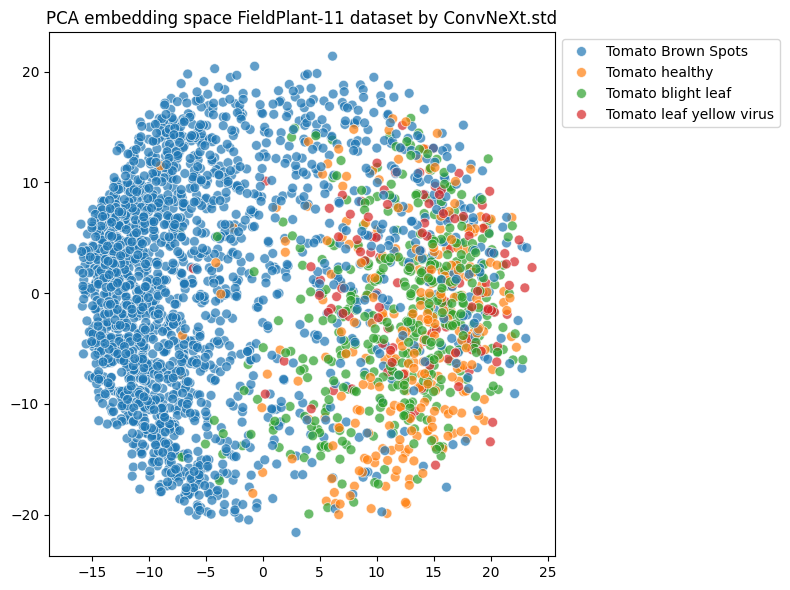

In [65]:
# PCA
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Giảm chiều bằng PCA hoặc t-SNE
# X = np.array(embeddings_np) # turn list => array (n_samples, n_features)
print(embeddings_np.shape)
pca = PCA(n_components=3) # n_components <= min(n_samples, n_features)
X_reduced = pca.fit_transform(embeddings_np) # n_features => 2 features,

# Vẽ
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=labels, palette="tab10", s=50, alpha=0.7)
plt.title(f"PCA embedding space {data_name} dataset by {model_name}")
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

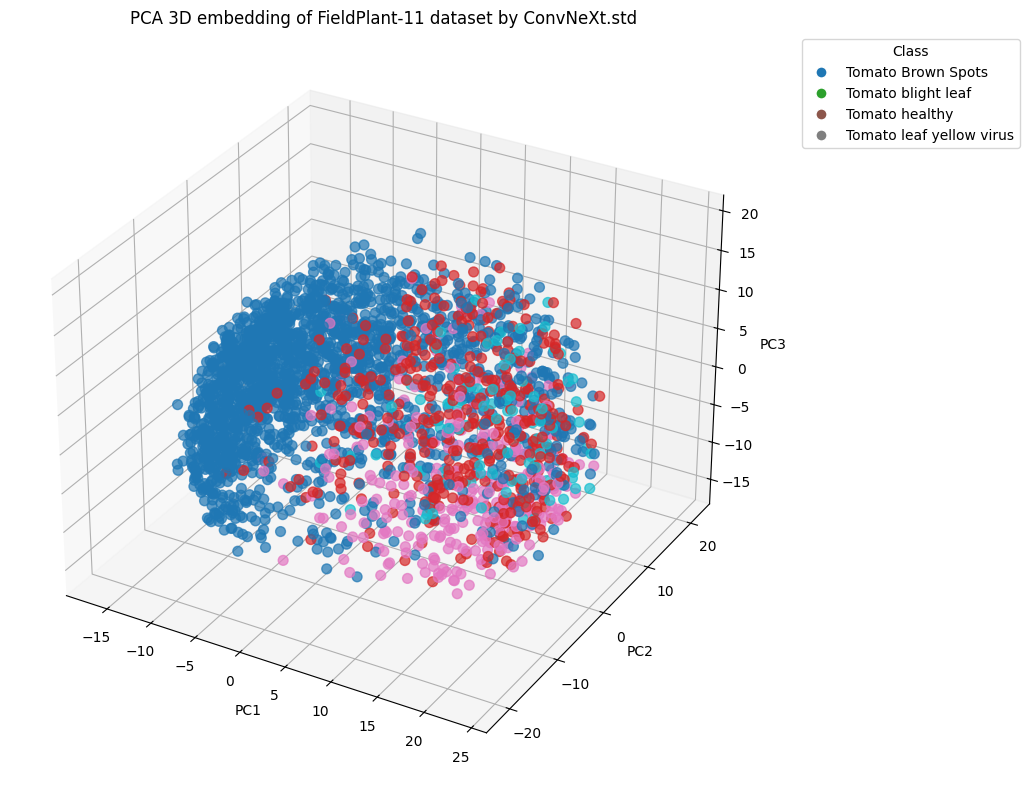

In [66]:
# Vẽ PCA 3D
from sklearn.preprocessing import LabelEncoder

# Encode string labels to integers
label_encoder = LabelEncoder()
label_ids = label_encoder.fit_transform(labels)  # array of ints

# Dùng label_ids để vẽ màu
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2],
    c=label_ids,
    cmap='tab10',
    s=50,
    alpha=0.7
)

# Gắn tên class tương ứng với màu
legend_labels = label_encoder.classes_
legend_handles = [plt.Line2D([0], [0], marker='o', color='w',
                             label=cls, markerfacecolor=plt.cm.tab10(i / len(legend_labels)),
                             markersize=8)
                  for i, cls in enumerate(legend_labels)]

ax.set_title(f"PCA 3D embedding of {data_name} dataset by {model_name}")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left', title="Class")
plt.tight_layout()
plt.show()